In [12]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=c1959da02c3a7acdb4d8cf4bf7a0781862902086ecb3a2d8a173230e35d45ea9
  Stored in directory: c:\users\jessica ocaña falcón\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
os.chdir("C:\Anaconda3\diplomadoml")

In [5]:
mi_tabla = pd.read_csv("boston.csv")
dataset = mi_tabla.select_dtypes(np.number)

In [6]:
mi_tabla

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
objetivo = dataset["MEDV"]
variables_independientes = dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [10]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [15]:
modelo.fit(X=variables_independientes,y=objetivo)
modelo.intercept_
modelo.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [16]:
dataset["Co_predict"] = modelo.predict(variables_independientes)

dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Co_predict
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


In [17]:
from sklearn import metrics
metrics.mean_absolute_error(dataset["MEDV"], dataset["Co_predict"])

3.270862810900317

In [18]:
np.sqrt(metrics.mean_squared_error(dataset["MEDV"],dataset["Co_predict"]))

4.679191295697282

In [19]:
modelo_r2 = metrics.r2_score(dataset["MEDV"], dataset["Co_predict"])
modelo_r2

0.7406426641094094

In [21]:
modelo_r2_ajustado = 1 - (1-modelo_r2)*(len(objetivo)-1)/(len(objetivo)-variables_independientes.shape[1]-1)
modelo_r2_ajustado

0.7337897263724629

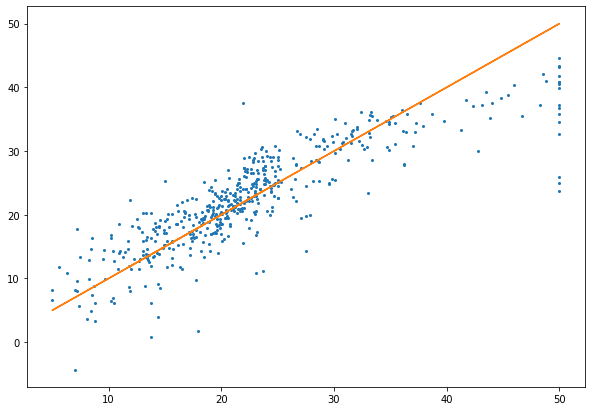

In [22]:
import matplotlib.pyplot as plt
x=dataset["MEDV"]
y=dataset["Co_predict"]
plt.figure(figsize=(10,7))
plt.plot(x,y,"o",markersize=2)
plt.plot(x,x,"-")
plt.show()